# 0. Import Libraries and Read source data

In [ ]:
import pandas as pd
from datetime import datetime
import numpy as np

In [ ]:
samples = pd.read_csv('./application_samples.csv')

In [ ]:
features = pd.read_csv('./credit_features.csv')

In [ ]:
data_dict = pd.read_csv('./data_dictionary.csv')

# 1. EDA

In [ ]:
data_dict

,Name,Description
0,UID,unique identifier
1,Application Date,Date of loan application
2,Amount,Amount requested by applicant
3,Term,Repayment period requested by applicant
4,Employment Type,Stated employment
5,LoanPurpose,Purpose of loan
6,Success,Applicant successful
7,ALL_AgeOfOldestAccount,Age of oldest accounts
8,ALL_AgeOfYoungestAccount,Age of youngest accounts
9,ALL_Count,No. of accounts


In [ ]:
samples.head()

,UID,ApplicationDate,Amount,Term,EmploymentType,LoanPurpose,Success
0,4921736,03/07/2020,2000,60,Employed - full time,Unexpected bills,0
1,1241981,04/02/2020,3000,60,Employed - full time,Starting new bussniess,0
2,5751748,02/08/2020,20000,60,Employed - full time,Business capital,0
3,7163425,23/09/2020,20000,60,Self employed,New business venture,0
4,227377,01/01/2020,5000,36,Employed - full time,car,0


In [ ]:
samples.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8847 entries, 0 to 8846
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   UID              8847 non-null   int64 
 1   ApplicationDate  8847 non-null   object
 2   Amount           8847 non-null   int64 
 3   Term             8847 non-null   int64 
 4   EmploymentType   8847 non-null   object
 5   LoanPurpose      8847 non-null   object
 6   Success          8847 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 483.9+ KB


In [ ]:
samples['UID'].nunique()

8847

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8847 entries, 0 to 8846
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   UID                                   8847 non-null   int64  
 1   ALL_AgeOfOldestAccount                8847 non-null   int64  
 2   ALL_AgeOfYoungestAccount              8847 non-null   int64  
 3   ALL_Count                             8847 non-null   int64  
 4   ALL_CountActive                       8847 non-null   int64  
 5   ALL_CountClosedLast12Months           8847 non-null   int64  
 6   ALL_CountDefaultAccounts              8847 non-null   int64  
 7   ALL_CountOpenedLast12Months           8847 non-null   int64  
 8   ALL_CountSettled                      8847 non-null   int64  
 9   ALL_MeanAccountAge                    8847 non-null   float64
 10  ALL_SumCurrentOutstandingBal          8847 non-null   int64  
 11  ALL_SumCurrentOut

In [ ]:
# since this column has only one unique value across all rows.
# and it doesn’t provide any useful information for modeling, as it has no variability.
# Dropping it can simplify the dataset without losing any predictive power.
print(features['ALL_TimeSinceMostRecentDefault'].nunique())
features = features.drop(columns=['ALL_TimeSinceMostRecentDefault'])

1


In [ ]:
features.describe()

,UID,ALL_AgeOfOldestAccount,ALL_AgeOfYoungestAccount,ALL_Count,ALL_CountActive,ALL_CountClosedLast12Months,ALL_CountDefaultAccounts,ALL_CountOpenedLast12Months,ALL_CountSettled,ALL_MeanAccountAge,ALL_SumCurrentOutstandingBal,ALL_SumCurrentOutstandingBalExcMtg,ALL_WorstPaymentStatusActiveAccounts
count,8.847000e+03,8847.000000,8847.000000,8847.000000,8847.000000,8847.000000,8847.000000,8847.000000,8847.000000,8847.000000,8.847000e+03,8847.000000,8847.000000
mean,4.753101e+06,162.694021,8.587431,17.515316,9.258506,1.589691,1.380355,2.453487,8.231491,57.285159,5.416258e+04,12858.636148,2.057647
std,2.766232e+06,94.569878,13.081866,13.900171,4.896900,2.611921,2.749450,2.964837,11.419963,29.132180,1.074432e+05,17756.568825,3.139938
min,2.160090e+05,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000e+00,-1.000000,-1.000000
25%,2.376933e+06,100.000000,2.000000,9.000000,6.000000,0.000000,0.000000,1.000000,2.000000,38.770000,3.396000e+03,2438.000000,0.000000
50%,4.463541e+06,151.000000,5.000000,15.000000,9.000000,1.000000,0.000000,2.000000,5.000000,53.120000,1.267000e+04,8336.000000,0.000000
75%,7.194733e+06,212.000000,10.000000,22.000000,12.000000,2.000000,2.000000,3.000000,10.000000,71.530000,6.171250e+04,17990.500000,7.000000
max,9.684478e+06,999.000000,258.000000,233.000000,43.000000,60.000000,23.000000,62.000000,215.000000,304.000000,4.004808e+06,581415.000000,7.000000


In [ ]:
features['ALL_WorstPaymentStatusActiveAccounts'].nunique()

9

## 1-1. Generate Full_df merging application_samples & features

In [ ]:
full_df = pd.merge(samples, features, on = 'UID')

In [ ]:
full_df.head()

,UID,ApplicationDate,Amount,Term,EmploymentType,LoanPurpose,Success,ALL_AgeOfOldestAccount,ALL_AgeOfYoungestAccount,ALL_Count,ALL_CountActive,ALL_CountClosedLast12Months,ALL_CountDefaultAccounts,ALL_CountOpenedLast12Months,ALL_CountSettled,ALL_MeanAccountAge,ALL_SumCurrentOutstandingBal,ALL_SumCurrentOutstandingBalExcMtg,ALL_WorstPaymentStatusActiveAccounts
0,4921736,03/07/2020,2000,60,Employed - full time,Unexpected bills,0,162,17,18,12,0,0,0,6,70.94,68555,15019,0
1,1241981,04/02/2020,3000,60,Employed - full time,Starting new bussniess,0,266,30,14,10,0,4,0,4,104.79,2209,2209,7
2,5751748,02/08/2020,20000,60,Employed - full time,Business capital,0,90,52,4,2,0,1,0,2,68.25,5108,5108,7
3,7163425,23/09/2020,20000,60,Self employed,New business venture,0,163,19,14,6,1,1,0,8,67.50,25738,25738,0
4,227377,01/01/2020,5000,36,Employed - full time,car,0,129,2,38,19,4,9,8,19,56.45,5801,5801,7


In [ ]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8847 entries, 0 to 8846
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   UID                                   8847 non-null   int64  
 1   ApplicationDate                       8847 non-null   object 
 2   Amount                                8847 non-null   int64  
 3   Term                                  8847 non-null   int64  
 4   EmploymentType                        8847 non-null   object 
 5   LoanPurpose                           8847 non-null   object 
 6   Success                               8847 non-null   int64  
 7   ALL_AgeOfOldestAccount                8847 non-null   int64  
 8   ALL_AgeOfYoungestAccount              8847 non-null   int64  
 9   ALL_Count                             8847 non-null   int64  
 10  ALL_CountActive                       8847 non-null   int64  
 11  ALL_CountClosedLa

In [ ]:
# There's no NaN value.
full_df.isna().sum()

UID                                     0
ApplicationDate                         0
Amount                                  0
Term                                    0
EmploymentType                          0
LoanPurpose                             0
Success                                 0
ALL_AgeOfOldestAccount                  0
ALL_AgeOfYoungestAccount                0
ALL_Count                               0
ALL_CountActive                         0
ALL_CountClosedLast12Months             0
ALL_CountDefaultAccounts                0
ALL_CountOpenedLast12Months             0
ALL_CountSettled                        0
ALL_MeanAccountAge                      0
ALL_SumCurrentOutstandingBal            0
ALL_SumCurrentOutstandingBalExcMtg      0
ALL_WorstPaymentStatusActiveAccounts    0
dtype: int64

In [ ]:
full_df.head()

,UID,ApplicationDate,Amount,Term,EmploymentType,LoanPurpose,Success,ALL_AgeOfOldestAccount,ALL_AgeOfYoungestAccount,ALL_Count,ALL_CountActive,ALL_CountClosedLast12Months,ALL_CountDefaultAccounts,ALL_CountOpenedLast12Months,ALL_CountSettled,ALL_MeanAccountAge,ALL_SumCurrentOutstandingBal,ALL_SumCurrentOutstandingBalExcMtg,ALL_WorstPaymentStatusActiveAccounts
0,4921736,03/07/2020,2000,60,Employed - full time,Unexpected bills,0,162,17,18,12,0,0,0,6,70.94,68555,15019,0
1,1241981,04/02/2020,3000,60,Employed - full time,Starting new bussniess,0,266,30,14,10,0,4,0,4,104.79,2209,2209,7
2,5751748,02/08/2020,20000,60,Employed - full time,Business capital,0,90,52,4,2,0,1,0,2,68.25,5108,5108,7
3,7163425,23/09/2020,20000,60,Self employed,New business venture,0,163,19,14,6,1,1,0,8,67.50,25738,25738,0
4,227377,01/01/2020,5000,36,Employed - full time,car,0,129,2,38,19,4,9,8,19,56.45,5801,5801,7


# 2. Preprocessing - Feature Engineering

## Preprocessing Object type
ApplicationDate, EmploymentType and LoanPurpose need to be preprocessed since they are the object types which is inappropriate type when we use them as an input of machine learning.
- 1 'ApplicationDate' : Transform into datetime format, extract year, month, and day as separate columns, extract the day of the week and calculate the number of days since the application date to use all of them as features.
- 2 'EmploymentType' : Use one-hot encoding which is a basic encoding technique when we have a few unique values in categories
- 3 'LoanPurpose': Has more than 2,000 different unique values.


### 1. samples['ApplicationDate]

In [ ]:
# Assuming `ApplicationDate` is in the 'DD/MM/YYYY' format
full_df['ApplicationDate'] = pd.to_datetime(full_df['ApplicationDate'], format='%d/%m/%Y')

In [ ]:
# Extracting year, month, and day as separate columns
# we don't need year since it's just all 2020
# samples['ApplicationYear'] = samples['ApplicationDate'].dt.year
full_df['ApplicationMonth'] = full_df['ApplicationDate'].dt.month
full_df['ApplicationDay'] = full_df['ApplicationDate'].dt.day

# Extracting the day of the week (0=Monday, 6=Sunday)
full_df['ApplicationDayOfWeek'] = full_df['ApplicationDate'].dt.dayofweek

# Calculate the number of days since the application date
current_date = datetime.now()
full_df['DaysSinceApplication'] = (current_date - full_df['ApplicationDate']).dt.days

Why Use Sine and Cosine Encoding?

For cyclical features:

	•	One-hot encoding might not effectively capture the relationship between the “start” and “end” points. For instance, January (1) and December (12) are close in the cycle, but one-hot encoding would treat them as entirely separate.

In [ ]:
# Sine and cosine encoding for ApplicationMonth (1 to 12)
full_df['ApplicationMonth_sin'] = np.sin(2 * np.pi * full_df['ApplicationMonth'] / 12)
full_df['ApplicationMonth_cos'] = np.cos(2 * np.pi * full_df['ApplicationMonth'] / 12)

# Sine and cosine encoding for ApplicationDay (1 to 31)
full_df['ApplicationDay_sin'] = np.sin(2 * np.pi * full_df['ApplicationDay'] / 31)
full_df['ApplicationDay_cos'] = np.cos(2 * np.pi * full_df['ApplicationDay'] / 31)

# Sine and cosine encoding for ApplicationDayOfWeek (1 to 7)
full_df['ApplicationDayOfWeek_sin'] = np.sin(2 * np.pi * full_df['ApplicationDayOfWeek'] / 7)
full_df['ApplicationDayOfWeek_cos'] = np.cos(2 * np.pi * full_df['ApplicationDayOfWeek'] / 7)

In [ ]:
full_df.drop(columns=['ApplicationDate','ApplicationMonth','ApplicationDay','ApplicationDayOfWeek'], inplace= True)

### 2. ['EmploymentType]

In [ ]:
full_df['EmploymentType'].value_counts()

Employed - full time    7714
Employed - part time     570
Self employed            418
Retired                  145
Name: EmploymentType, dtype: int64

In [ ]:
full_df = pd.get_dummies(full_df, columns = ['EmploymentType'])
full_df.head()

,UID,Amount,Term,LoanPurpose,Success,ALL_AgeOfOldestAccount,ALL_AgeOfYoungestAccount,ALL_Count,ALL_CountActive,ALL_CountClosedLast12Months,...,ApplicationMonth_sin,ApplicationMonth_cos,ApplicationDay_sin,ApplicationDay_cos,ApplicationDayOfWeek_sin,ApplicationDayOfWeek_cos,EmploymentType_Employed - full time,EmploymentType_Employed - part time,EmploymentType_Retired,EmploymentType_Self employed
0,4921736,2000,60,Unexpected bills,0,162,17,18,12,0,...,-0.500000,-8.660254e-01,0.571268,0.820763,-0.433884,-0.900969,1,0,0,0
1,1241981,3000,60,Starting new bussniess,0,266,30,14,10,0,...,0.866025,5.000000e-01,0.724793,0.688967,0.781831,0.623490,1,0,0,0
2,5751748,20000,60,Business capital,0,90,52,4,2,0,...,-0.866025,-5.000000e-01,0.394356,0.918958,-0.781831,0.623490,1,0,0,0
3,7163425,20000,60,New business venture,0,163,19,14,6,1,...,-1.000000,-1.836970e-16,-0.998717,-0.050649,0.974928,-0.222521,0,0,0,1
4,227377,5000,36,car,0,129,2,38,19,4,...,0.500000,8.660254e-01,0.201299,0.979530,0.974928,-0.222521,1,0,0,0


### 3. 'LoanPurpose'

In [ ]:
# We have more than 2,000 unique values of Loan Purpose, we need to categorize them.
full_df['LoanPurpose'].nunique()

2444

In [ ]:
full_df['LoanPurpose'].value_counts()[:30]

Car                   978
Consolidation         581
car                   373
Debt consolidation    357
Other                 310
Home improvement      224
Home improvements     221
consolidation         137
debt consolidation    133
home improvements     113
Debt Consolidation    103
New car                90
home improvement       86
Furniture              78
Home Improvments       67
Short Term Loan        65
Debt                   64
other                  59
Car repairs            50
Home Improvements      50
Car purchase           49
Debts                  49
new car                41
Car repair             40
Home Improvement       38
furniture              36
Wedding                36
Home                   33
Car loan               33
Vets bills             32
Name: LoanPurpose, dtype: int64

In [ ]:
# First of all, make all that in lower case since there are car, Car, home, Home...
full_df['LoanPurpose'] = full_df['LoanPurpose'].str.lower()

#### Tried TF-IDF Vectorization, but doesn't work well

In [ ]:
df = full_df.copy()

In [ ]:
# # TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 3))  # 2-grams
X_tfidf = vectorizer.fit_transform(df['LoanPurpose'])

## Vectorization and Clustering
number_of_cluster = 5
X_tfidf = vectorizer.fit_transform(df['LoanPurpose'])
kmeans = KMeans(n_clusters=number_of_cluster, random_state=42)
df['LoanPurposeCluster'] = kmeans.fit_predict(X_tfidf)

In [ ]:
# Get feature names from TF-IDF vectorizer
terms = vectorizer.get_feature_names()
# terms = vectorizer.get_feature_names_out()

# Display top terms for each cluster
for i, center in enumerate(kmeans.cluster_centers_):
    print(f"\nCluster {i} top terms:")
    term_indices = np.argsort(center)[-10:]  # Get indices of top 10 terms
    top_terms = [terms[ind] for ind in term_indices]
    print(top_terms)


Cluster 0 top terms:
['house', 'loan', 'new car', 'furniture', 'new', 'debts', 'car', 'home improvements', 'home', 'improvements']

Cluster 1 top terms:
['decorated house', 'decorating', 'decorating home', 'decorating house', 'decorating vet', 'decking', 'çar tax insurance', 'home', 'improvement', 'home improvement']

Cluster 2 top terms:
['decorating', 'decorating home', 'decorating house', 'decorating vet', 'decorating vet bills', 'decor', 'çar tax insurance', 'consolidation', 'debt consolidation', 'debt']

Cluster 3 top terms:
['decorated house', 'decorating', 'decorating home', 'decorating house', 'decorating vet', 'decorating vet bills', 'decoration', 'dekory', 'çar tax insurance', 'car']

Cluster 4 top terms:
['decorated', 'decorated house', 'decorating', 'decorating home', 'decorating house', 'decorating vet', 'decorating vet bills', 'decking garden', 'çar tax insurance', 'consolidation']


/Users/minjoo/opt/anaconda3/envs/nlp/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


#### So Why not Transformer

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

In [ ]:
# Generation of Embedding of Sentence-BERT model
# transformer_model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
transformer_model = SentenceTransformer('paraphrase-MiniLM-L6-v2', device='cpu')

In [ ]:
loan_purpose_embeddings = transformer_model.encode(full_df['LoanPurpose'])

In [ ]:
# KMeans Clustering
# It should be more than 8 as experimented
kmeans = KMeans(n_clusters=12, random_state=42)
full_df['LoanPurposeCluster'] = kmeans.fit_predict(loan_purpose_embeddings)

In [ ]:
# Display sample texts from each cluster

num_clusters = full_df['LoanPurposeCluster'].nunique() 
for cluster in range(num_clusters):
    print(f"\nCluster {cluster}:")
    cluster_texts = full_df[full_df['LoanPurposeCluster'] == cluster]['LoanPurpose'].sample(20, random_state=42)
    for text in cluster_texts:
        print(f"- {text}")


Cluster 0:
- consolidation
- consolidation
- consolidation
- consolidation
- consolidation
- consolidation. holiday
- consolidation
- consolidation
- consolidation
- consolidation
- consolidation
- consolidation
- consolidation
- consolidation & holiday
- consolidation
- consolidation
- consolidation
- consolidation
- consolidation
- consolidation

Cluster 1:
- car purchase
- car
- new van, advertising
- car purchase
- car
- car
- car
- car
- car
- car
- a car
- car
- car
- car
- car
- to buy a new car
- used car
- van
- new car
- car

Cluster 2:
- credit cards
- paying credit card
- consolidate credit cards
- consolidate credit cards
- clear cards
- car and credit card
- home improvement and pay off credit card
- consoladate credit
- various things including clearing credit card
- pay credit cards
- credit cards
- repay credit cards
- credit card consolidation
- car and credit card
- credit card x2
- credit card payment
- pay credit card off
- credit cards
- credit card consolidation

In [ ]:
# Show all texts in Cluster 0
cluster_0_texts = full_df[full_df['LoanPurposeCluster'] == 0]['LoanPurpose']
print(list(cluster_0_texts.unique()))

['car & consolidate', 'consolidation', 'consolidate dept', 'consolidate/flat deposit', 'consolidate', 'consolidation and car', 'r consolidation', 'dept consolidation', 'consolidatec', 'consolidated', 'consolidation of bills', 'consolídate', 'consolidation of finances', 'consolidation/car', 'consolidation/repairs', 'consolidation of a couple of bills', 'consolidation and travel', 'consolidation & studies', 'finance products consolidation', 'dept consolidate', 'bills and consolidation', 'traveling and consolidation', 'part consolidation', 'detb consolidation', 'consolidation to enable a move', 'bill consolidation', 'consolidation.', 'tools and consolidation', 'consolidate other depts', 'consolidate other loads', 'dent consolidation', 'consolidate bill', 'holiday and consolidation', 'glasses, consolidation', 'consolidation and other bits', 'car, consolidation', 'car and consolidation', 'consolidation and holiday', 'consolidation, holiday', 'holiday,car,consolidation', 'holiday & consolida

In [ ]:
# One-hot encode the LoanPurposeCluster column
full_df = pd.get_dummies(full_df, columns=['LoanPurposeCluster'], prefix='Cluster')

In [ ]:
# Now we don't need the actual LoanPurpose column, because we just categorized them.
full_df.drop(columns = ['LoanPurpose'], inplace = True)

In [ ]:
full_df

,UID,Amount,Term,Success,ALL_AgeOfOldestAccount,ALL_AgeOfYoungestAccount,ALL_Count,ALL_CountActive,ALL_CountClosedLast12Months,ALL_CountDefaultAccounts,...,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,Cluster_9,Cluster_10,Cluster_11
0,4921736,2000,60,0,162,17,18,12,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1241981,3000,60,0,266,30,14,10,0,4,...,0,0,0,0,1,0,0,0,0,0
2,5751748,20000,60,0,90,52,4,2,0,1,...,0,0,0,1,0,0,0,0,0,0
3,7163425,20000,60,0,163,19,14,6,1,1,...,0,0,0,0,1,0,0,0,0,0
4,227377,5000,36,0,129,2,38,19,4,9,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8842,8681053,5000,60,0,164,2,22,16,2,0,...,0,0,1,0,0,0,0,0,0,0
8843,8768469,8000,24,0,275,20,7,4,1,1,...,0,0,1,0,0,0,0,0,0,0
8844,8794971,1000,36,0,145,8,14,13,0,0,...,0,0,1,0,0,0,0,0,0,0
8845,8875138,10000,60,0,12,7,4,3,1,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
# full_df.to_csv('full_df.csv', index=False)

In [ ]:
# End

# 3. Feature Selection - Using Techniques

In [ ]:
full_df.drop(columns = ['UID'], inplace = True)

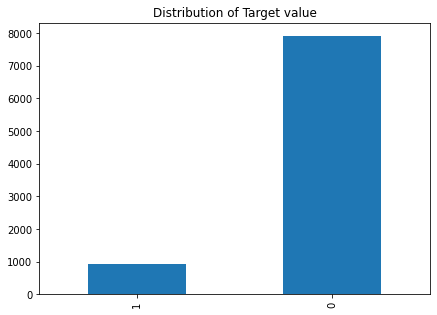

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (7,5))
full_df.Success.value_counts().sort_values().plot(kind = 'bar')
plt.title('Distribution of Target value')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define X and y
X = full_df.drop(columns=['Success'])
y = full_df['Success']

# Split into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    shuffle = True,
                                                    test_size = 0.2,
                                                    random_state = 42,
                                                    stratify = y)
# Reset index
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Scale the data
scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

## 3-0. Define Baseline Model

### Generate class for efficiency

In [ ]:
from sklearn.metrics import f1_score, average_precision_score
import seaborn as sns

class ModelEvaluator:
    def __init__(self):
        self.graph_df = pd.DataFrame(columns = ['Method', 'f1_score', 'pr_auc_score'])

    def calculate_update_score(self, model, method, selected_features, manual_X_train=None, manual_X_test=None):
        
        # if selected_features == 'manual' and manual_X_train is not None and manual_X_test is not None:
        if isinstance(selected_features, str) and selected_features == 'manual' and manual_X_train is not None and manual_X_test is not None:
            sel_X_train = manual_X_train
            sel_X_train = manual_X_train
            sel_X_test = manual_X_test
            num_features = manual_X_train.shape[1]
        else:
            sel_X_train = X_train_scaled[selected_features]
            sel_X_test = X_test_scaled[selected_features]
            num_features = len(selected_features)

        model.fit(sel_X_train, y_train)

        y_pred = model.predict(sel_X_test)
        y_probs = model.predict_proba(sel_X_test)[:, 1]

        f1 = round(f1_score(y_test, y_pred, average = 'weighted'), 2)
        pr_auc = round(average_precision_score(y_test, y_probs), 2)

        print(f'{method}_n_features_{num_features}_f1_score :, {f1}')
        print(f'{method}_n_features_{num_features}_pr_auc_score : {pr_auc}')

        # Append results to the graph DataFrame
        self.graph_df = self.graph_df.append({
            'Method' : f'{method}_n_features_{num_features}',
            'f1_score' : f1,
            'pr_auc_score' : pr_auc
        }, ignore_index = True)

    def plot_scores(self):
        graph_df_long = self.graph_df.melt(id_vars = 'Method', var_name = 'Metric', value_name = 'Score')

        # Dynamically adjust the figure width based on the number of methods
        fig_width = max(8, len(self.graph_df['Method'].unique()) * 2)  # Ensures a minimum width of 8
        plt.figure(figsize=(fig_width, 6))

        # Plot with seaborn
        ax = sns.barplot(x = 'Method', y = 'Score', hue = 'Metric', data = graph_df_long)
        plt.title('Comparison of F1 score and PR-AUC score by method')
        plt.ylabel('Score')
        plt.xlabel('Method')
        plt.ylim(0,1)
        ax.legend(loc = 'upper left', bbox_to_anchor=(1, 1))

        # Add values on top of each bar
        for container in ax.containers:
            ax.bar_label(container, fmt = '%.2f', padding = 3)

        plt.xticks(rotation = 45, ha = 'right')
        plt.tight_layout()
        plt.show()

In [ ]:
evaluator = ModelEvaluator()

In [ ]:
from sklearn import tree

base_model = tree.DecisionTreeClassifier(random_state= 42)

base_n_features_37_f1_score :, 0.85
base_n_features_37_pr_auc_score : 0.16


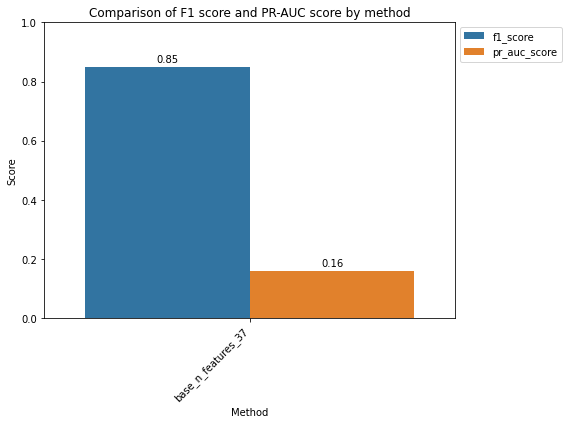

In [ ]:
evaluator = ModelEvaluator()
evaluator.calculate_update_score(base_model, method = 'base', selected_features = X.columns)
evaluator.plot_scores()

## 3-1. Filter Methods -(1) Variance Threshold

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled_minmax = scaler.fit_transform(X_train)

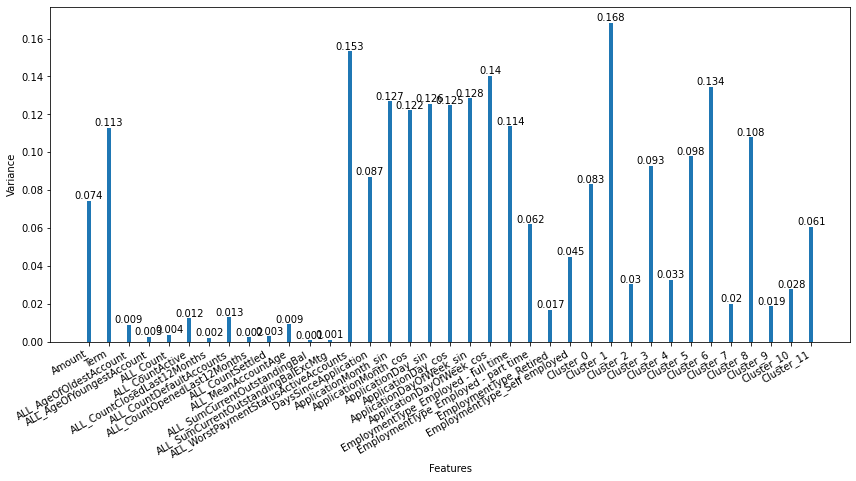

In [ ]:
fig, ax = plt.subplots(figsize = (12,6))

x = X.columns
y = X_train_scaled_minmax.var(axis=0)

ax.bar(x, y, width=0.2)
ax.set_xlabel('Features')
ax.set_ylabel('Variance')
# ax.set_ylim(0, 0.1)

for index, value in enumerate(y):
    plt.text(x=index, y=value+0.001, s=str(round(value, 3)), ha='center')

plt.tight_layout()
fig.autofmt_xdate()
plt.show()

In [ ]:
# var_threshold = 0.1
var_threshold = 0.01
var_selected_cols = X.columns[[value > var_threshold for value in X_train_scaled_minmax.var(axis=0)]]
print(var_selected_cols)

Index(['Amount', 'Term', 'ALL_CountActive', 'ALL_CountDefaultAccounts',
       'ALL_WorstPaymentStatusActiveAccounts', 'DaysSinceApplication',
       'ApplicationMonth_sin', 'ApplicationMonth_cos', 'ApplicationDay_sin',
       'ApplicationDay_cos', 'ApplicationDayOfWeek_sin',
       'ApplicationDayOfWeek_cos', 'EmploymentType_Employed - full time',
       'EmploymentType_Employed - part time', 'EmploymentType_Retired',
       'EmploymentType_Self employed', 'Cluster_0', 'Cluster_1', 'Cluster_2',
       'Cluster_3', 'Cluster_4', 'Cluster_5', 'Cluster_6', 'Cluster_7',
       'Cluster_8', 'Cluster_9', 'Cluster_10', 'Cluster_11'],
      dtype='object')


Var_threshole_0.01_n_features_28_f1_score :, 0.85
Var_threshole_0.01_n_features_28_pr_auc_score : 0.16


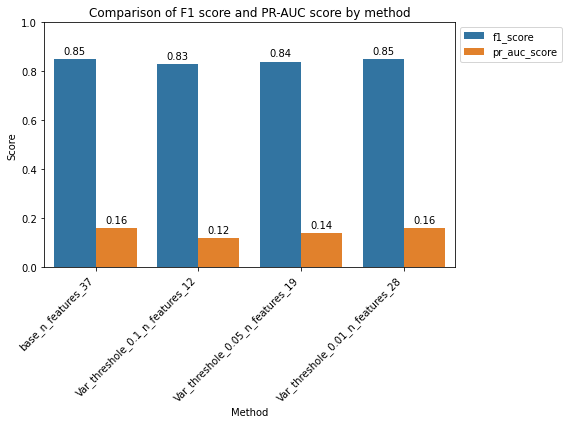

In [ ]:
evaluator.calculate_update_score(base_model, method = f'Var_threshole_{var_threshold}', selected_features=var_selected_cols)
evaluator.plot_scores()

After dropping some columns that has low variance, the f1 score and pr_auc score get low. so decided not to drop any columns from here.

## 3-1. Filter Methods - (2) Correlation

피처간의 상관계수가 0.8을 넘을 때, target 과의 상관계수가 높은 것을 살리고 하나는 drop.
target과의 상관계수 중에서 높은것 N 개 만 살리기

In [ ]:
# Step 1: Calculate the correlation matrix using Spearman
correlation_matrix = full_df.corr(method='spearman')

# Step 2: Calculate correlation of each feature with the target
target_corr = full_df.corr()['Success'].abs().drop('Success')

# Step 3: Identify pairs of features with high inter-correlation
correlation_threshold = 0.8
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Step 4: For each pair of highly correlated features, drop the one with the lower correlation to the target
to_drop = set()  # Use a set to avoid duplicate entries
for column in upper_triangle.columns:
    high_corr_features = upper_triangle.index[upper_triangle[column].abs() > correlation_threshold].tolist()
    for feature in high_corr_features:
        # Compare correlation with the target and keep the more correlated feature
        if target_corr[feature] > target_corr[column]:
            to_drop.add(column)
        else:
            to_drop.add(feature)

# Drop the selected features from X_train
print(to_drop)
X_reduced = X.drop(columns=to_drop)

# Step 5: Select top `n` features with the highest absolute correlation to the target
n = 5  # Number of top features to keep
corr_selected_cols = target_corr.drop(index=to_drop).nlargest(n).index.tolist()

print("Selected features:", corr_selected_cols)

{'ALL_CountSettled', 'ALL_CountDefaultAccounts', 'ALL_Count'}
Selected features: ['ALL_WorstPaymentStatusActiveAccounts', 'Amount', 'ALL_MeanAccountAge', 'ALL_AgeOfOldestAccount', 'ALL_CountOpenedLast12Months']


In [ ]:
corr_selected_cols

['ALL_WorstPaymentStatusActiveAccounts',
 'Amount',
 'ALL_MeanAccountAge',
 'ALL_AgeOfOldestAccount',
 'ALL_CountOpenedLast12Months']

- Corr_1 : For each pair of highly correlated features, drop the one with the lower correlation to the target only -> n_features = 34
- Corr_2 : Corr_1 + chosse top N features in the order of highest absolute correlation to the target -> n_features = 10

base_n_features_37_f1_score :, 0.85
base_n_features_37_pr_auc_score : 0.16


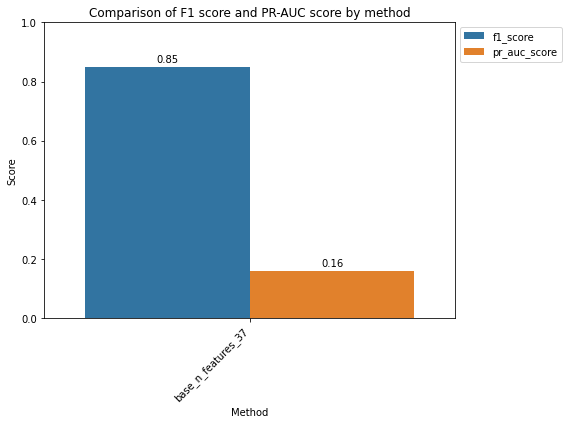

In [ ]:
evaluator = ModelEvaluator()
evaluator.calculate_update_score(base_model, method = 'base', selected_features = X.columns)
evaluator.plot_scores()

Corr_n_features_5_f1_score :, 0.83
Corr_n_features_5_pr_auc_score : 0.13


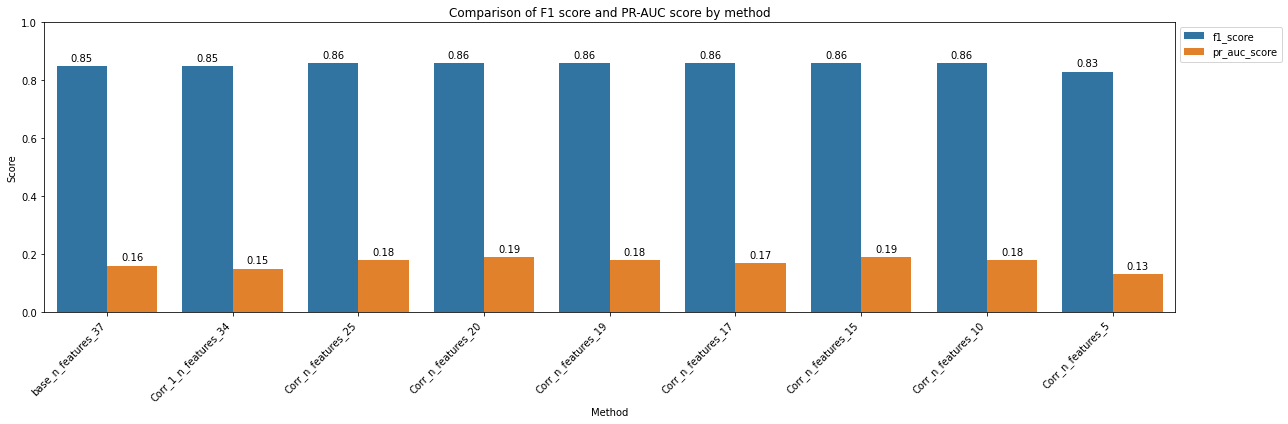

In [ ]:
# evaluator.calculate_update_score(base_model, method = 'Corr_1', selected_features = X_reduced.columns)
evaluator.calculate_update_score(base_model, method = 'Corr', selected_features = corr_selected_cols)

evaluator.plot_scores()

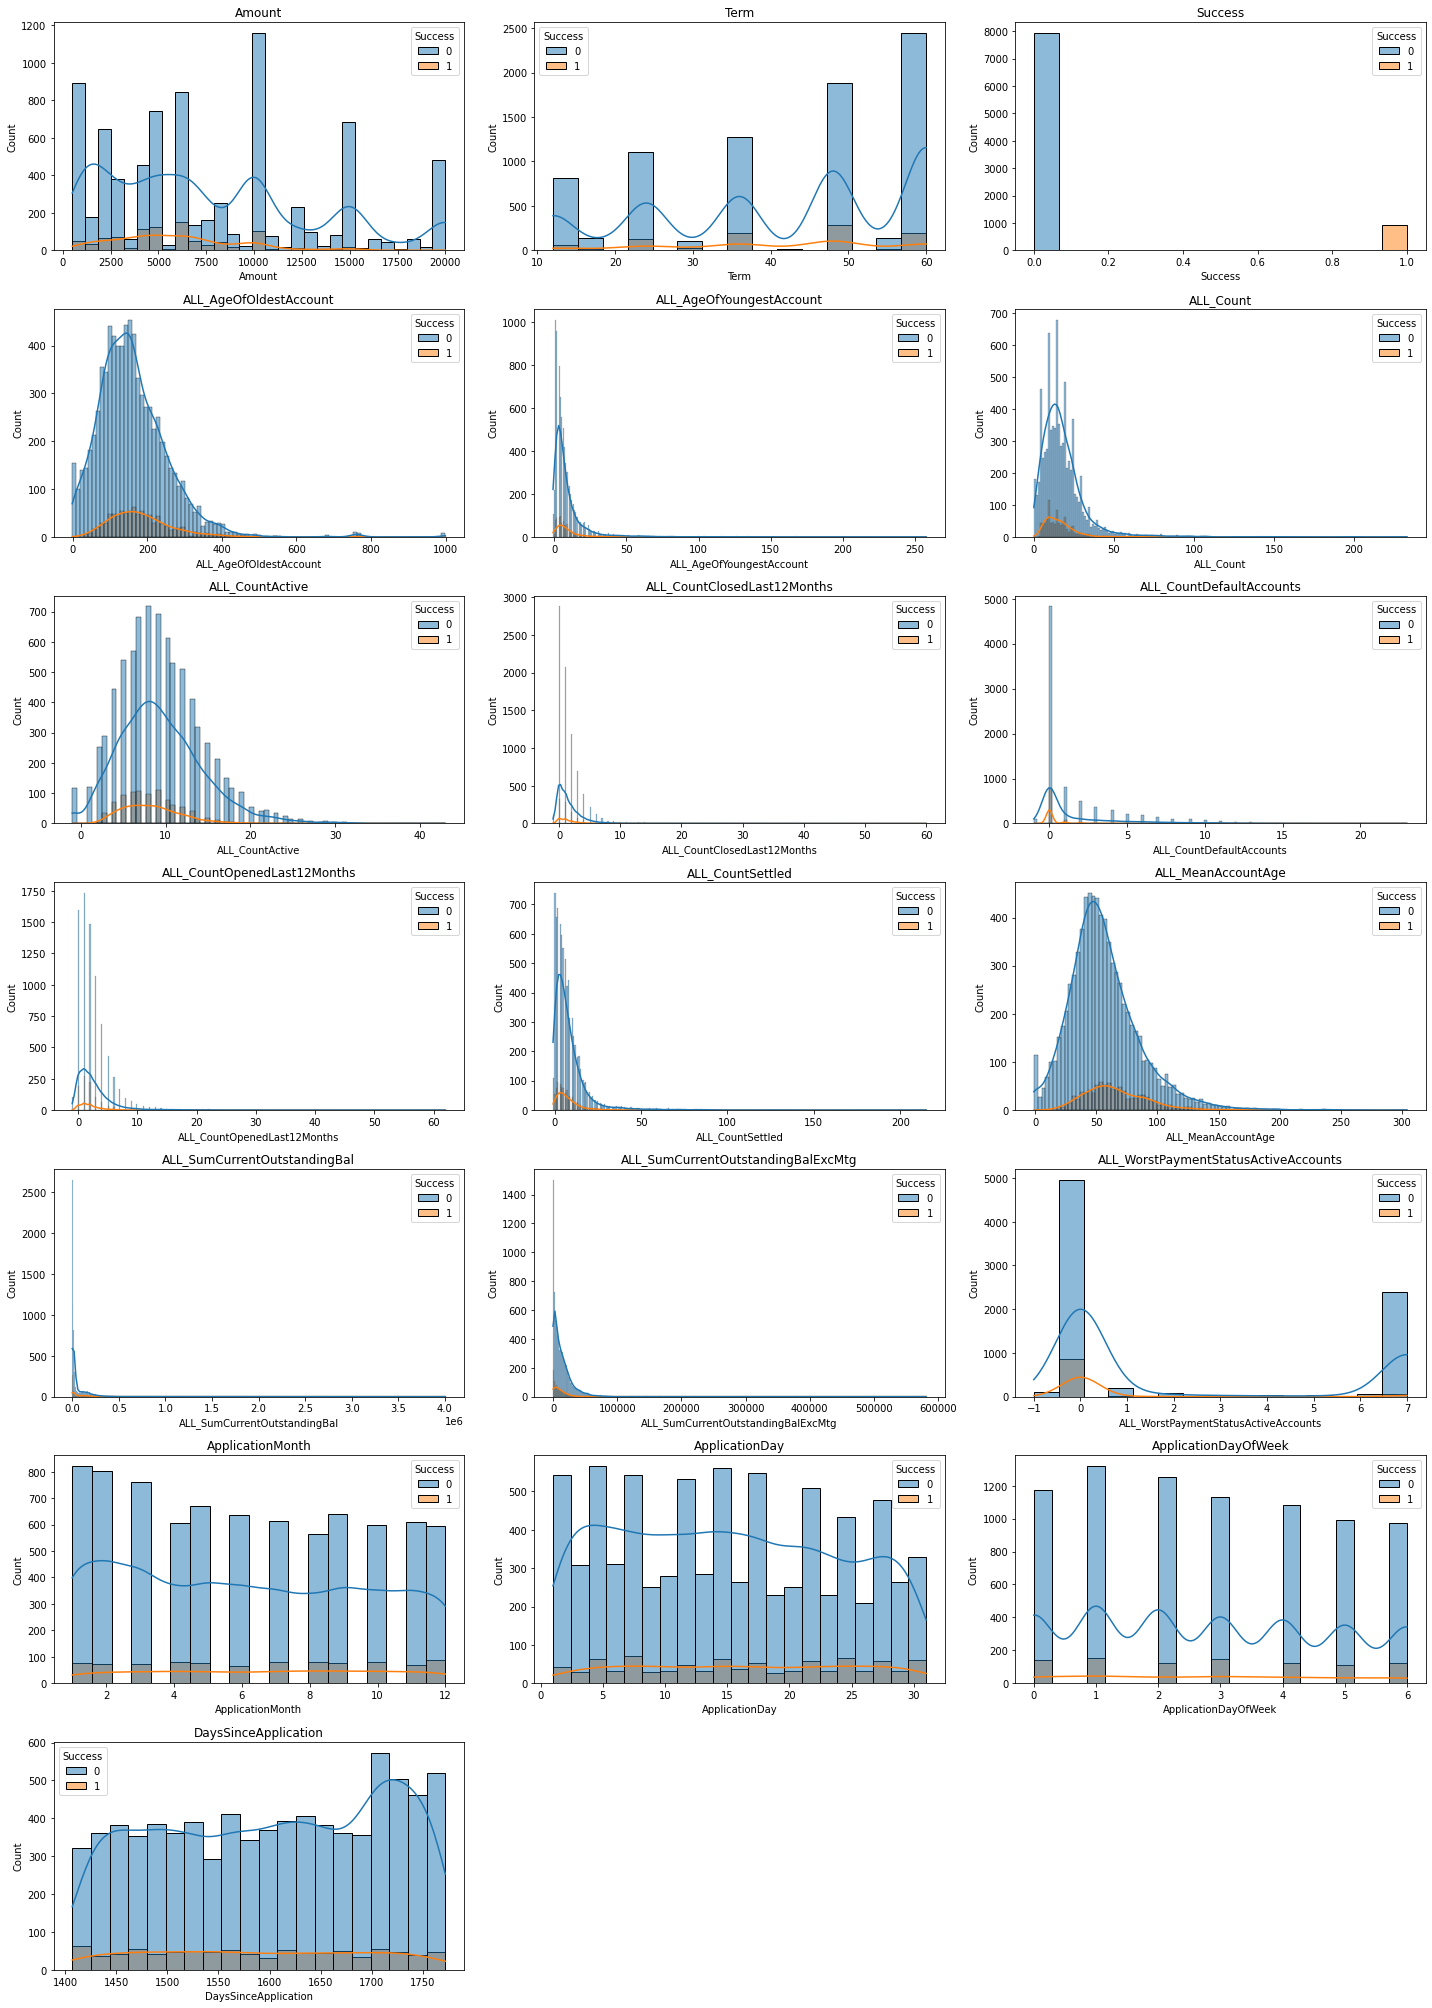

In [ ]:
num_features = full_df.select_dtypes(include=['float64', 'int64']).columns

num_plots = len(num_features)
ncols = 3
nrows = (num_plots // ncols) + (num_plots % ncols > 0)

fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize = (20, nrows * 4))
axes = axes.flatten()

for i, feature in enumerate(num_features):
    sns.histplot(data = full_df, x = feature, hue = 'Success', kde = True, ax = axes[i])
    axes[i].set_title(feature)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## 3-1. Filter Method - (3) Mutual Information

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

In [ ]:
f1_score_list = []
pr_auc_score_list = []

In [ ]:
len(X.columns)

37

In [ ]:
for k in range(1, len(X.columns)+1):
    selector = SelectKBest(mutual_info_classif, k = k)
    selector.fit(X_train, y_train)

    kbest_X_train = selector.transform(X_train)
    kbest_X_test = selector.transform(X_test)

    base_model.fit(kbest_X_train, y_train)
    kbest_y_pred = base_model.predict(kbest_X_test)
    kbest_y_probs = base_model.predict_proba(kbest_X_test)[:, 1]

    kbest_f1_score = round(f1_score(y_test, kbest_y_pred, average = 'weighted'), 3)
    kbest_pr_auc_score = round(average_precision_score(y_test, kbest_y_probs), 3)

    f1_score_list.append(kbest_f1_score)
    pr_auc_score_list.append(kbest_pr_auc_score)
    

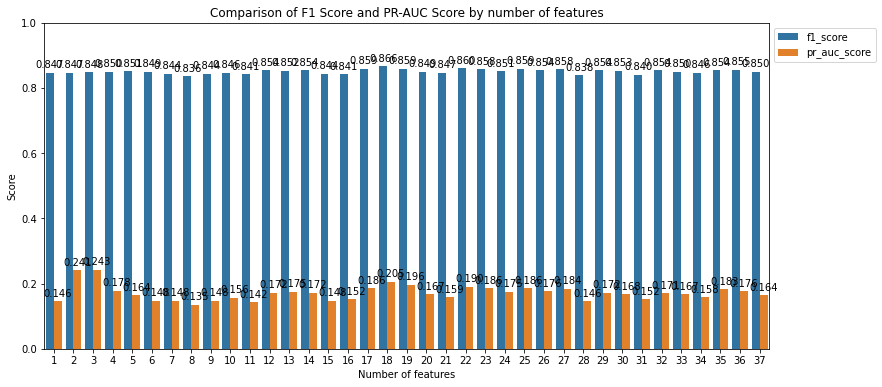

In [ ]:
temp_df = pd.DataFrame({
    'number_features' : range(1,len(X.columns)+1),
    'f1_score' : f1_score_list,
    'pr_auc_score' : pr_auc_score_list
})

# Melt the DataFrame into long format
temp_df_long = temp_df.melt(id_vars='number_features', var_name='Metric', value_name='Score')

# Plot with Seaborn
plt.figure(figsize=(13, 6))
ax = sns.barplot(x='number_features', y='Score', hue='Metric', data= temp_df_long)
plt.title('Comparison of F1 Score and PR-AUC Score by number of features')
plt.ylabel('Score')
plt.xlabel('Number of features')
plt.ylim(0,1)
ax.legend(loc = 'upper left', bbox_to_anchor=(1, 1))

# Add values on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', padding=3)

plt.show()

In [ ]:
selector = SelectKBest(mutual_info_classif, k=15)
selector.fit(X_train, y_train)

selected_feature_mask = selector.get_support()

mi_sel_features = X_train.columns[selected_feature_mask]

mi_sel_features

Index(['Amount', 'ALL_AgeOfOldestAccount', 'ALL_AgeOfYoungestAccount',
       'ALL_Count', 'ALL_CountActive', 'ALL_CountClosedLast12Months',
       'ALL_CountDefaultAccounts', 'ALL_CountOpenedLast12Months',
       'ALL_CountSettled', 'ALL_MeanAccountAge',
       'ALL_SumCurrentOutstandingBalExcMtg',
       'ALL_WorstPaymentStatusActiveAccounts', 'Cluster_2', 'Cluster_4',
       'Cluster_9'],
      dtype='object')

In [ ]:
evaluator = ModelEvaluator()
evaluator.calculate_update_score(base_model, method = 'base', selected_features = X.columns)

base_n_features_37_f1_score :, 0.85
base_n_features_37_pr_auc_score : 0.16


Filter_MI_n_features_15_f1_score :, 0.84
Filter_MI_n_features_15_pr_auc_score : 0.14


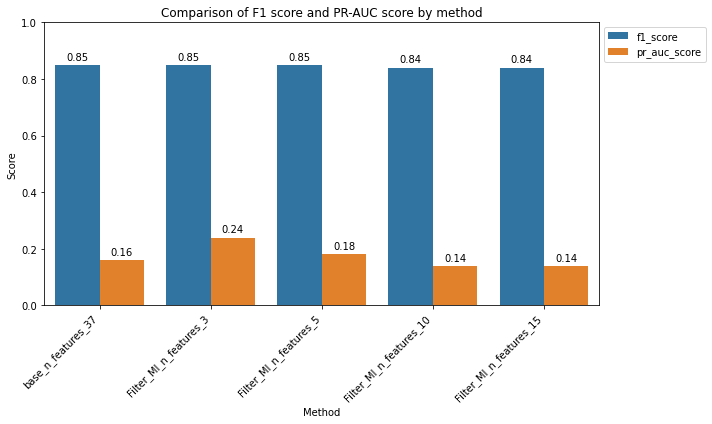

In [ ]:
evaluator.calculate_update_score(base_model, method = 'Filter_MI', selected_features = mi_sel_features)
evaluator.plot_scores()

## 3-2. Wrapper Methods - Recursive feature Elimination (RFE)

- Reduing features is the key
- find the minimal features
- model to be not complex
- Calculate the featrue importnace
- Wrapper - forward, backward, bi-directional
- model can add or drop the features 
- wrap features together

vary depending on the model
- large coffecient
- large feature importance

the difference between RFE and Embedded method is RME removes features iteratively based on feature importance but does so ouside of the main training process.

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import StratifiedKFold

In [ ]:
# Define cross-validation strategy
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Custom scorers for weighted F1 and PR-AUC
weighted_f1_scorer = make_scorer(f1_score, average='weighted')
pr_auc_scorer = make_scorer(average_precision_score, needs_proba=True)

# Use RFECV to perform RFE with cross-validation
# We specify 'f1' as the scoring to optimize F1-score during feature selection
selector = RFECV(estimator=base_model, step=1, cv=cv_strategy, scoring = weighted_f1_scorer, min_features_to_select=5)
selector.fit(X_train_scaled, y_train)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
      estimator=DecisionTreeClassifier(random_state=42),
      min_features_to_select=5,
      scoring=make_scorer(f1_score, average=weighted))

In [ ]:
# Print selected feature names
selected_features = X_train.columns[selector.support_]
optimal_n_features = selector.n_features_
optimal_score = max(selector.cv_results_['mean_test_score'])
print("Optimal number of features : ", optimal_n_features)
print("Selected Features:", selected_features.to_list())
print("Cross-validated Weighted F1 Score at optimal features", round(optimal_score,2))

Optimal number of features :  18
Selected Features: ['Amount', 'Term', 'ALL_AgeOfOldestAccount', 'ALL_AgeOfYoungestAccount', 'ALL_Count', 'ALL_CountActive', 'ALL_CountClosedLast12Months', 'ALL_CountSettled', 'ALL_MeanAccountAge', 'ALL_SumCurrentOutstandingBal', 'ALL_SumCurrentOutstandingBalExcMtg', 'ALL_WorstPaymentStatusActiveAccounts', 'DaysSinceApplication', 'ApplicationMonth_sin', 'ApplicationMonth_cos', 'ApplicationDay_sin', 'ApplicationDay_cos', 'ApplicationDayOfWeek_cos']
Cross-validated Weighted F1 Score at optimal features 0.85


In [ ]:
##############################################################
# Transform X to keep only the selected features
X_train_selected = selector.transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)

# Re-fit the model on the training set with selected features
base_model.fit(X_train_selected, y_train)

# Predict probabilities on the test set to adjust the threshold
y_probs = base_model.predict_proba(X_test_selected)[:, 1]
y_pred = base_model.predict(X_test_selected)

# Try different thresholds to optimize F1 score
f1 = f1_score(y_test, y_pred, average= 'weighted')
pr_auc = average_precision_score(y_test, y_probs)
rfe_pr_auc = pr_auc

print("Weighted F1 score with selected features:", round(f1,2))
print("PR-AUC with selected features:", round(pr_auc,2))


# for threshold in [0.2, 0.3, 0.4, 0.5, 0.6]:
#     y_pred = (y_probs >= threshold).astype(int)
#     f1 = f1_score(y_test, y_pred, average = 'weighted')
#     print(f"F1 score at threshold {threshold}: {round(f1, 3)}")

# # Apply threshold of 0.4 to obtain binary predictions
# y_pred = (y_probs >= 0.4).astype(int)
# # Calculate F1 score with the adjusted threshold
# rfe_f1 = f1_score(y_test, y_pred, average='weighted')
# print(f"\nF1 score with threshold 0.4: {round(rfe_f1, 3)}")

Weighted F1 score with selected features: 0.86
PR-AUC with selected features: 0.18


In [ ]:
evaluator = ModelEvaluator()
evaluator.calculate_update_score(base_model, method = 'base', selected_features = X.columns)

base_n_features_37_f1_score :, 0.85
base_n_features_37_pr_auc_score : 0.16


Wrapper_RFE_n_features_18_f1_score :, 0.86
Wrapper_RFE_n_features_18_pr_auc_score : 0.18


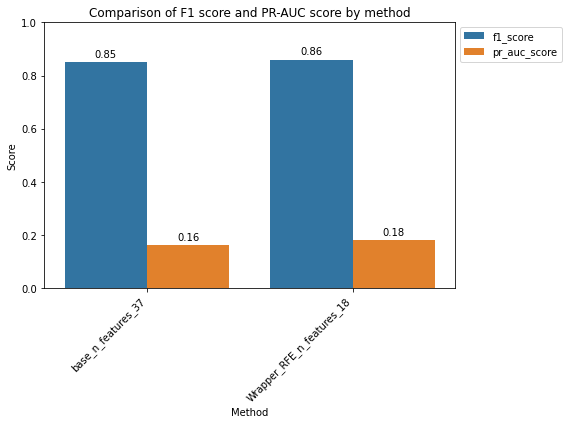

In [ ]:
evaluator.calculate_update_score(base_model, method = 'Wrapper_RFE', selected_features = selected_features)
evaluator.plot_scores()

## 3-3. Embedded Methods (Feature Importance)

RF, Ridge, Elastic Net
It sees feature importance 
integrated feature selection into model training.
feature selection is built into the model training itself, like penalizing less important features with L1 Regularization.

### Lasso

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform  # For sampling C values on a logarithmic scale

param_dist = {'C': loguniform(0.001, 1)}
feature_names = X.columns

# model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)

random_search = RandomizedSearchCV(estimator=base_model, param_distributions=param_dist, scoring=weighted_f1_scorer, cv=cv, n_iter=10, random_state=42)
random_search.fit(X_train_scaled, y_train)

# Get the best C value and F1 score
best_C = random_search.best_params_['C']
best_score = random_search.best_score_
print(f"Best C from Random Search: {best_C}")
print(f"Best Weighted F1 Score from Random Search: {best_score:.3f}")

# Check the number of selected features
best_model = random_search.best_estimator_
num_selected_features = np.sum(best_model.coef_[0] != 0)
print(f"Number of selected features with best C: {num_selected_features}")
lasso_coefficients = best_model.coef_[0]
selected_features_lasso = [feature_names[i] for i, coef in enumerate(lasso_coefficients) if coef != 0]
print("Selected features by Lasso:", selected_features_lasso)

Best C from Random Search: 0.7114476009343418
Best Weighted F1 Score from Random Search: 0.856
Number of selected features with best C: 33
Selected features by Lasso: ['Amount', 'Term', 'ALL_AgeOfOldestAccount', 'ALL_AgeOfYoungestAccount', 'ALL_CountActive', 'ALL_CountClosedLast12Months', 'ALL_CountDefaultAccounts', 'ALL_CountOpenedLast12Months', 'ALL_CountSettled', 'ALL_MeanAccountAge', 'ALL_SumCurrentOutstandingBal', 'ALL_SumCurrentOutstandingBalExcMtg', 'ALL_WorstPaymentStatusActiveAccounts', 'DaysSinceApplication', 'ApplicationMonth_sin', 'ApplicationMonth_cos', 'ApplicationDay_sin', 'ApplicationDay_cos', 'ApplicationDayOfWeek_sin', 'EmploymentType_Employed - full time', 'EmploymentType_Retired', 'EmploymentType_Self employed', 'Cluster_0', 'Cluster_1', 'Cluster_2', 'Cluster_3', 'Cluster_4', 'Cluster_6', 'Cluster_7', 'Cluster_8', 'Cluster_9', 'Cluster_10', 'Cluster_11']


### Feature Importances

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, f1_score

# Set up the cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# model = GradientBoostingClassifier(max_depth = 5, random_state=42)

# List to store feature importances from each fold
feature_importances = []

# For each fold, train the model and extract feature importance
for train_idx, val_idx in cv.split(X_train_scaled, y_train):
    # Split training and validation data
    # X_fold_train, X_fold_val = X_train_scaled[train_idx], X_train_scaled[val_idx]
    # y_fold_train, y_fold_val = y_train[train_idx], y_train[val_idx]
    X_fold_train, X_fold_val = X_train_scaled.iloc[train_idx], X_train_scaled.iloc[val_idx]
    y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    # Train the model
    base_model.fit(X_fold_train, y_fold_train)
    
    # Store feature importances from this fold
    feature_importances.append(base_model.feature_importances_)

# Calculate the mean feature importance across all folds
mean_importances = np.mean(feature_importances, axis=0)

# Organize feature importances into a DataFrame for better readability
feature_names = X.columns.to_list()
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': mean_importances})


# Custom scorer
weighted_f1_scorer = make_scorer(f1_score, average='weighted')
pr_auc_scorer = make_scorer(average_precision_score, needs_proba=True)

# Baseline Model: Evaluate using all features (no feature selection) on training data with cross-validation
weighted_f1_all_features = cross_val_score(base_model, X_train_scaled, y_train, cv=cv, scoring=weighted_f1_scorer).mean()
pr_auc_all_features = cross_val_score(base_model, X_train_scaled, y_train, cv=cv, scoring=pr_auc_scorer).mean()
print(f"All features - Cross-Validated Weighted F1 Score: {round(weighted_f1_all_features,2)}, Cross-Validated PR-AUC: {round(pr_auc_all_features,2)}")


# Method 1: Select the top N features (e.g., top 10 features)
top_n = 10
selected_features_top_n = feature_importances_df.sort_values(by='Importance', ascending=False).head(top_n)
top_n_features = selected_features_top_n['Feature'].values
print("Top N Features:\n", selected_features_top_n)

# Re-train model using only the top N features and evaluate PR-AUC and weighted F1 score
# Ensure top_n_features contains the column names, not indices
X_train_top_n = X_train_scaled[top_n_features]  # Select columns by name
X_test_top_n = X_test_scaled[top_n_features]    # Repeat for test set
# X_train_top_n = X_train_scaled[:, [feature_names.index(f) for f in top_n_features]]
weighted_f1_top_n = cross_val_score(base_model, X_train_top_n, y_train, cv=cv, scoring=weighted_f1_scorer).mean()
pr_auc_top_n = cross_val_score(base_model, X_train_top_n, y_train, cv=cv, scoring=pr_auc_scorer).mean()
print(f"Top {top_n} features - Weighted F1 Score: {round(weighted_f1_top_n,2)}, PR-AUC: {round(pr_auc_top_n,2)}")

# Method 2: Select features above the 80th percentile threshold
percentile_threshold = 80
threshold = np.percentile(mean_importances, percentile_threshold)
selected_features_percentile = feature_importances_df[feature_importances_df['Importance'] > threshold]
percentile_features = selected_features_percentile['Feature'].values
print(f"\nFeatures above {percentile_threshold}th percentile:\n", selected_features_percentile)

# Re-train model using only the features above the threshold and evaluate PR-AUC and weighted F1 score
# X_train_percentile = X_train_scaled[:, [feature_names.index(f) for f in percentile_features]]
X_train_percentile = X_train_scaled[percentile_features]
weighted_f1_percentile = cross_val_score(base_model, X_train_percentile, y_train, cv=cv, scoring=weighted_f1_scorer).mean()
pr_auc_percentile = cross_val_score(base_model, X_train_percentile, y_train, cv=cv, scoring=pr_auc_scorer).mean()
print(f"Features above {percentile_threshold}th percentile - Weighted F1 Score: {round(weighted_f1_percentile,2)}, PR-AUC: {round(pr_auc_percentile,2)}")

All features - Cross-Validated Weighted F1 Score: 0.85, Cross-Validated PR-AUC: 0.16
Top N Features:
                                Feature  Importance
10                  ALL_MeanAccountAge    0.104159
0                               Amount    0.100544
12  ALL_SumCurrentOutstandingBalExcMtg    0.096294
11        ALL_SumCurrentOutstandingBal    0.083557
14                DaysSinceApplication    0.058472
2               ALL_AgeOfOldestAccount    0.058411
5                      ALL_CountActive    0.045015
3             ALL_AgeOfYoungestAccount    0.044157
4                            ALL_Count    0.041752
17                  ApplicationDay_sin    0.040382
Top 10 features - Weighted F1 Score: 0.83, PR-AUC: 0.13

Features above 80th percentile:
                                Feature  Importance
0                               Amount    0.100544
2               ALL_AgeOfOldestAccount    0.058411
3             ALL_AgeOfYoungestAccount    0.044157
5                      ALL_CountActive    0

In [ ]:
# ---------- Final Evaluation on Test Set ----------

# Baseline Model: Evaluate using all features on the test set
model.fit(X_train_scaled, y_train)  # Train on full training data with all features
y_pred_test_all = model.predict(X_test_scaled)
y_proba_test_all = model.predict_proba(X_test_scaled)[:, 1]
f1_test_all = f1_score(y_test, y_pred_test_all, average='weighted')
pr_auc_test_all = average_precision_score(y_test, y_proba_test_all)
print(f"All features - Test Weighted F1 Score: {f1_test_all}, Test PR-AUC: {pr_auc_test_all}")

# Final model training and testing using top N features
X_train_top_n_final = X_train_scaled[:, [feature_names.index(f) for f in top_n_features]]
X_test_top_n = X_test_scaled[:, [feature_names.index(f) for f in top_n_features]]

# Fit the model on the selected features from the training set
model.fit(X_train_top_n_final, y_train)

# Make predictions on the test set
y_pred_test_top_n = model.predict(X_test_top_n)
y_proba_test_top_n = model.predict_proba(X_test_top_n)[:, 1]

# Calculate F1 score and PR-AUC on the test set
f1_test_top_n = f1_score(y_test, y_pred_test_top_n, average='weighted')
pr_auc_test_top_n = average_precision_score(y_test, y_proba_test_top_n)

print(f"Top {top_n} features - Test Weighted F1 Score: {f1_test_top_n}, Test PR-AUC: {pr_auc_test_top_n}")

# Final model training and testing using percentile-based features
X_train_percentile_final = X_train_scaled[:, [feature_names.index(f) for f in percentile_features]]
X_test_percentile = X_test_scaled[:, [feature_names.index(f) for f in percentile_features]]

# Fit the model on the selected features from the training set
model.fit(X_train_percentile_final, y_train)

# Make predictions on the test set
y_pred_test_percentile = model.predict(X_test_percentile)
y_proba_test_percentile = model.predict_proba(X_test_percentile)[:, 1]

# Calculate F1 score and PR-AUC on the test set
f1_test_percentile = f1_score(y_test, y_pred_test_percentile, average='weighted')
pr_auc_test_percentile = average_precision_score(y_test, y_proba_test_percentile)

print(f"Features above {percentile_threshold}th percentile - Test Weighted F1 Score: {f1_test_percentile}, Test PR-AUC: {pr_auc_test_percentile}")

All features - Test Weighted F1 Score: 0.8883270980019898, Test PR-AUC: 0.47675113195204877
Top 10 features - Test Weighted F1 Score: 0.881339556603002, Test PR-AUC: 0.430222192789161
Features above 80th percentile - Test Weighted F1 Score: 0.8765328576329638, Test PR-AUC: 0.41014361242232134


## 3-4. PCA (Dimentionality Reduction)

In [ ]:
evaluator = ModelEvaluator()

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=25)
pca_X_train = pca.fit_transform(X_train_scaled)
pca_X_test = pca.transform(X_test_scaled)

PCA_n_features_25_f1_score :, 0.82
PCA_n_features_25_pr_auc_score : 0.12


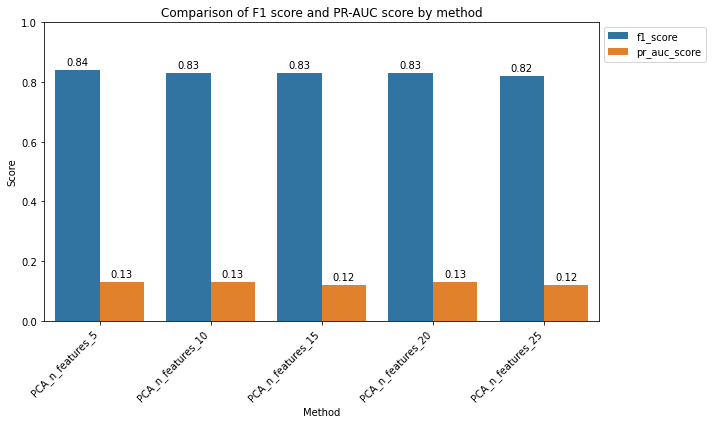

In [ ]:
evaluator.calculate_update_score(base_model, method = 'PCA', selected_features = 'manual', manual_X_train= pca_X_train, manual_X_test=pca_X_test)
evaluator.plot_scores()

# 4. Modeling & Evaluation

Try all the different models
and also find the best threshold

KNN???
CatBoost
GBM
XGBoost
Logistic Regression
Decision trees
Random Forests

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score

In [ ]:
def evaluate_model(model, x_test, y_test, desired_precision):

    # predict test data
    y_pred = model.predict(x_test)

    # calculate accuracy, precision, recall, f1-score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred, average = 'weighted')

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display Confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    clf_report = pd.DataFrame(metrics.classification_report(y_test, y_pred, output_dict=True)).transpose()
    clf_report= clf_report.round(2)

    # Predict probability
    y_prob_test = model.predict_proba(X_test)[:,1]
    precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_prob_test)
    pr_auc = metrics.auc(recall, precision)
    # print('PR-AUC-score : ', pr_auc)


    # desired_precision = 0.8
    for p,r,t in zip(precision, recall, thresholds):
        if p >= desired_precision :
            print(f"Threshold: {t:.2f}, Precision: {p:.2f}, Recall: {r:.2f}")
            selected_threshold = t
            y_pred_adjusted = (y_prob_test >= selected_threshold).astype(int)
            from sklearn.metrics import precision_score, recall_score

            # Calculate precision and recall at the adjusted threshold
            precision_adj = precision_score(y_test, y_pred_adjusted)
            recall_adj = recall_score(y_test, y_pred_adjusted)

            print(f"Adjusted Precision: {precision_adj:.2f}, Adjusted Recall: {recall_adj:.2f}")
            break

    # Plot the Precision-Recall curve
    plt.figure(figsize=(6, 4))
    plt.plot(recall, precision, marker='.', label='PR Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.grid()
    plt.show()

    # print('Accuracy :', acc)
    print('F1 Score :', round(f1,2))
    print('PR-AUC-score :', round(pr_auc,2))
    print('Precision :', round(prec,2))
    print('Recall :', round(rec,2))
    print('--------------------------------')
    # print('AUC-score :', auc)
    print('Confusion Matrix\n :', cm)
    print('--------------------------------')
    print('Classification Report\n', clf_report)


    # return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1,
    #         'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm, 'report' : clf_report}

### Logistic Regression

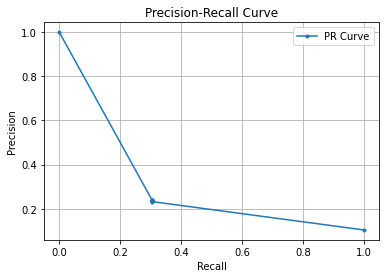

F1 Score : 0.86
PR-AUC-score : 0.31
Precision : 0.5
Recall : 0.06
--------------------------------
Confusion Matrix
 : [[1575   11]
 [ 173   11]]
--------------------------------
Classification Report
               precision  recall  f1-score  support
0                  0.90    0.99      0.94   1586.0
1                  0.50    0.06      0.11    184.0
accuracy           0.90    0.90      0.90      0.9
macro avg          0.70    0.53      0.53   1770.0
weighted avg       0.86    0.90      0.86   1770.0


In [ ]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver = 'liblinear')
lr_clf.fit(X_train_scaled, y_train)

# Evaluate
evaluate_model(lr_clf, X_test_scaled, y_test, 0.8)

In [ ]:
lr_clf = LogisticRegression(solver = 'liblinear')
param_distributions = {'C' : uniform(0.01, 10),
                       'penalty' : ['l1', 'l2']}

lr_clf_cv = RandomizedSearchCV(lr_clf, param_distributions, n_iter = 100, scoring = 'average_precision', cv = 5, random_state = 42, n_jobs =-1)
lr_clf_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f7978975c10>,
                                        'penalty': ['l1', 'l2']},
                   random_state=42, scoring='average_precision')

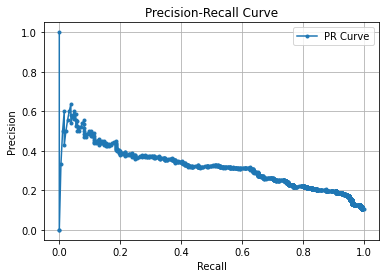

F1 Score : 0.86
PR-AUC-score : 0.32
Precision : 0.5
Recall : 0.06
--------------------------------
Confusion Matrix
 : [[1575   11]
 [ 173   11]]
--------------------------------
Classification Report
               precision  recall  f1-score  support
0                  0.90    0.99      0.94   1586.0
1                  0.50    0.06      0.11    184.0
accuracy           0.90    0.90      0.90      0.9
macro avg          0.70    0.53      0.53   1770.0
weighted avg       0.86    0.90      0.86   1770.0


In [ ]:
# Evaluate
evaluate_model(lr_clf_cv, X_test, y_test, 0.7)

### KNN

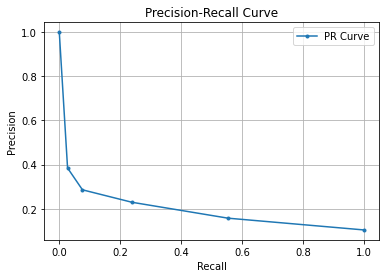

F1 Score : 0.85
PR-AUC-score : 0.2
Precision : 0.29
Recall : 0.08
--------------------------------
Confusion Matrix
 : [[1551   35]
 [ 170   14]]
--------------------------------
Classification Report
               precision  recall  f1-score  support
0                  0.90    0.98      0.94  1586.00
1                  0.29    0.08      0.12   184.00
accuracy           0.88    0.88      0.88     0.88
macro avg          0.59    0.53      0.53  1770.00
weighted avg       0.84    0.88      0.85  1770.00


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

# Evaluate
evaluate_model(knn_clf, X_test, y_test, 0.8)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
param_distributions = {
    'n_neighbors': randint(1, 30),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn_clf_cv = RandomizedSearchCV(knn_clf, param_distributions, n_iter = 100, scoring = 'average_precision', cv = 5, random_state = 42, n_jobs =-1)

knn_clf_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'metric': ['euclidean', 'manhattan',
                                                   'minkowski'],
                                        'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f79a1955290>,
                                        'weights': ['uniform', 'distance']},
                   random_state=42, scoring='average_precision')

Threshold: 0.65, Precision: 1.00, Recall: 0.01
Adjusted Precision: 1.00, Adjusted Recall: 0.01


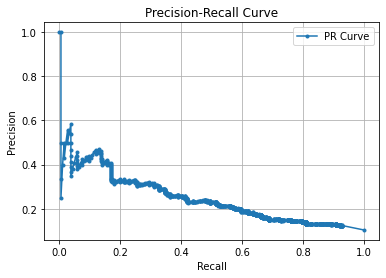

F1 Score : 0.85
PR-AUC-score : 0.25
Precision : 0.5
Recall : 0.02
--------------------------------
Confusion Matrix
 : [[1583    3]
 [ 181    3]]
--------------------------------
Classification Report
               precision  recall  f1-score  support
0                  0.90    1.00      0.95   1586.0
1                  0.50    0.02      0.03    184.0
accuracy           0.90    0.90      0.90      0.9
macro avg          0.70    0.51      0.49   1770.0
weighted avg       0.86    0.90      0.85   1770.0


In [ ]:
# Evaluate
evaluate_model(knn_clf_cv, X_test, y_test, 0.7)

### Decision Tree

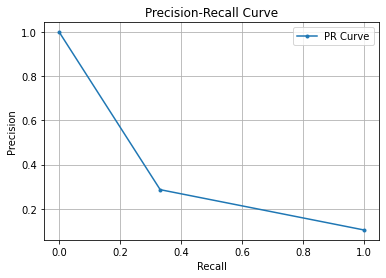

F1 Score : 0.85
PR-AUC-score : 0.34
Precision : 0.29
Recall : 0.33
--------------------------------
Confusion Matrix
 : [[1434  152]
 [ 123   61]]
--------------------------------
Classification Report
               precision  recall  f1-score  support
0                  0.92    0.90      0.91  1586.00
1                  0.29    0.33      0.31   184.00
accuracy           0.84    0.84      0.84     0.84
macro avg          0.60    0.62      0.61  1770.00
weighted avg       0.86    0.84      0.85  1770.00


In [ ]:
from sklearn import tree

# Decision Tree
dt_clf = tree.DecisionTreeClassifier(random_state= 42)
dt_clf.fit(X_train, y_train)

# Evaluate model
evaluate_model(dt_clf, X_test, y_test, 0.8)

In [ ]:
from sklearn import tree

# Decision Tree
dt_clf = tree.DecisionTreeClassifier(random_state= 42)
param_distributions = {'max_depth' : randint(3,10),
                       'min_samples_split' : randint(2,20),
                       'min_samples_leaf' : randint(1,10)}

dt_clf_cv = RandomizedSearchCV(dt_clf, param_distributions, n_iter = 100, scoring = 'average_precision', cv = 5, random_state = 42, n_jobs =-1)
dt_clf_cv.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f7989a1ed10>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f79aad1e7d0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f79899cc250>},
                   random_state=42, scoring='average_precision')

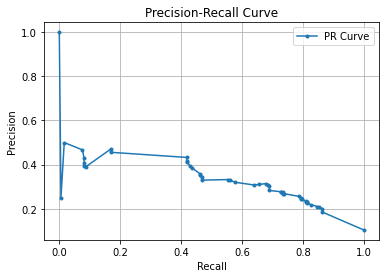

F1 Score : 0.86
PR-AUC-score : 0.34
Precision : 0.41
Recall : 0.08
--------------------------------
Confusion Matrix
 : [[1564   22]
 [ 169   15]]
--------------------------------
Classification Report
               precision  recall  f1-score  support
0                  0.90    0.99      0.94  1586.00
1                  0.41    0.08      0.14   184.00
accuracy           0.89    0.89      0.89     0.89
macro avg          0.65    0.53      0.54  1770.00
weighted avg       0.85    0.89      0.86  1770.00


In [ ]:
# Evaluate model
evaluate_model(dt_clf_cv, X_test, y_test, 0.8)

### Random Forest

Threshold: 0.67, Precision: 1.00, Recall: 0.01
Adjusted Precision: 1.00, Adjusted Recall: 0.01


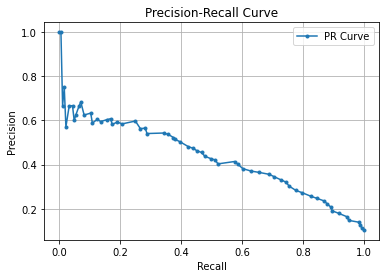

F1 Score : 0.87
PR-AUC-score : 0.43
Precision : 0.63
Recall : 0.1
--------------------------------
Confusion Matrix
 : [[1575   11]
 [ 165   19]]
--------------------------------
Classification Report
               precision  recall  f1-score  support
0                  0.91    0.99      0.95   1586.0
1                  0.63    0.10      0.18    184.0
accuracy           0.90    0.90      0.90      0.9
macro avg          0.77    0.55      0.56   1770.0
weighted avg       0.88    0.90      0.87   1770.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Building Random Forest model 
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)

# Evaluate Model
evaluate_model(rf_clf, X_test, y_test, 0.8)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Building Random Forest model 
rf_clf = RandomForestClassifier(random_state=0)
param_distributions = {
    'n_estimators': randint(50, 300),
    'max_depth': randint(5, 15),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}

rf_clf_cv = RandomizedSearchCV(rf_clf, param_distributions, n_iter=100, scoring='average_precision', cv=5, random_state=42, n_jobs=-1)
rf_clf_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f798997bc50>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f79a178cfd0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f79897b7bd0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f79a1917a90>},
                   random_state=42, scoring='average_precision')

Threshold: 0.41, Precision: 0.70, Recall: 0.14
Adjusted Precision: 0.70, Adjusted Recall: 0.14


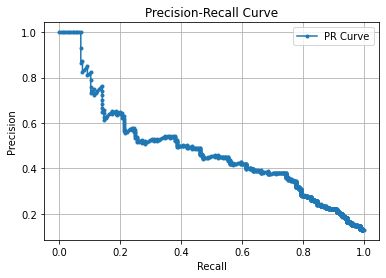

F1 Score : 0.85
PR-AUC-score : 0.48
Precision : 1.0
Recall : 0.01
--------------------------------
Confusion Matrix
 : [[1586    0]
 [ 183    1]]
--------------------------------
Classification Report
               precision  recall  f1-score  support
0                  0.90    1.00      0.95   1586.0
1                  1.00    0.01      0.01    184.0
accuracy           0.90    0.90      0.90      0.9
macro avg          0.95    0.50      0.48   1770.0
weighted avg       0.91    0.90      0.85   1770.0


In [ ]:
# Evaluate Model
evaluate_model(rf_clf_cv, X_test, y_test, 0.7)

### GBM

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Building Random Forest model 
gbm_clf = GradientBoostingClassifier()
param_distributions = {
    'learning_rate': uniform(0.01, 0.29),
    'n_estimators': randint(50, 300),
    'max_depth': randint(3, 10)
}

gbm_clf_cv = RandomizedSearchCV(gbm_clf, param_distributions, n_iter = 100, scoring = 'average_precision', cv = 5, random_state = 42, n_jobs =-1)
gbm_clf_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f79ba4b3450>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f79ba4889d0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f798977ee50>},
                   random_state=42, scoring='average_precision')

In [ ]:
# 88 47
# we have to find a threshold which can have the balanced precision and recall!


Threshold: 0.56, Precision: 0.71, Recall: 0.16
Adjusted Precision: 0.71, Adjusted Recall: 0.16


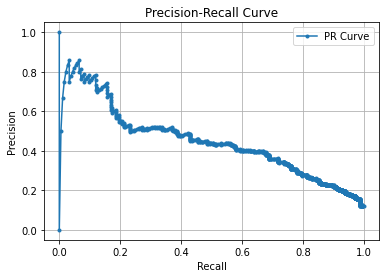

F1 Score : 0.88
PR-AUC-score : 0.45
Precision : 0.57
Recall : 0.2
--------------------------------
Confusion Matrix
 : [[1559   27]
 [ 148   36]]
--------------------------------
Classification Report
               precision  recall  f1-score  support
0                  0.91    0.98      0.95   1586.0
1                  0.57    0.20      0.29    184.0
accuracy           0.90    0.90      0.90      0.9
macro avg          0.74    0.59      0.62   1770.0
weighted avg       0.88    0.90      0.88   1770.0


In [ ]:
# Evaluate Model
evaluate_model(gbm_clf_cv, X_test, y_test, 0.7)

### CatBoost

Threshold: 0.62, Precision: 0.70, Recall: 0.14
Adjusted Precision: 0.70, Adjusted Recall: 0.14


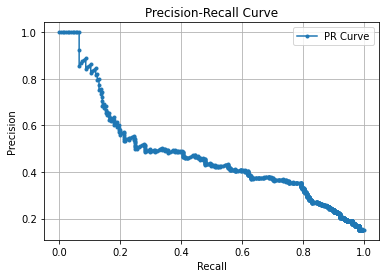

F1 Score : 0.88
PR-AUC-score : 0.48
Precision : 0.57
Recall : 0.21
--------------------------------
Confusion Matrix
 : [[1556   30]
 [ 145   39]]
--------------------------------
Classification Report
               precision  recall  f1-score  support
0                  0.91    0.98      0.95   1586.0
1                  0.57    0.21      0.31    184.0
accuracy           0.90    0.90      0.90      0.9
macro avg          0.74    0.60      0.63   1770.0
weighted avg       0.88    0.90      0.88   1770.0


In [ ]:
from catboost import CatBoostClassifier

# Building Random Forest model 
cb_clf = CatBoostClassifier(verbose = 0, random_state = 42, depth = 5)
# (n_estimators= 100, max_depth = 1, learning_rate= 1.0, random_state=0)
cb_clf.fit(X_train, y_train)

# Evaluate Model
evaluate_model(cb_clf, X_test, y_test, 0.7)

### XGBoost

Threshold: 0.77, Precision: 0.70, Recall: 0.11
Adjusted Precision: 0.70, Adjusted Recall: 0.11


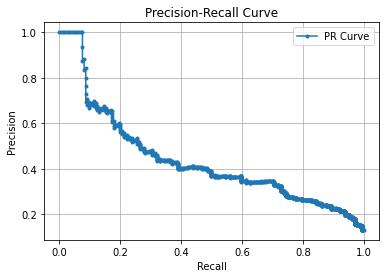

F1 Score : 0.88
PR-AUC-score : 0.44
Precision : 0.51
Recall : 0.27
--------------------------------
Confusion Matrix
 : [[1539   47]
 [ 135   49]]
--------------------------------
Classification Report
               precision  recall  f1-score  support
0                  0.92    0.97      0.94   1586.0
1                  0.51    0.27      0.35    184.0
accuracy           0.90    0.90      0.90      0.9
macro avg          0.71    0.62      0.65   1770.0
weighted avg       0.88    0.90      0.88   1770.0


In [ ]:
from xgboost import XGBClassifier

# Building Random Forest model 
xgb_clf = XGBClassifier()
# (n_estimators= 100, max_depth = 1, learning_rate= 1.0, random_state=0)
xgb_clf.fit(X_train, y_train)

# Evaluate Model
evaluate_model(xgb_clf, X_test, y_test, 0.7)

In [ ]:
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Define the parameter distributions for RandomizedSearchCV
param_distributions = {
    'n_estimators': randint(50, 300),            # Randomly choose values between 50 and 300
    'learning_rate': uniform(0.01, 0.3),         # Uniform distribution from 0.01 to 0.3
    'max_depth': randint(3, 10),                 # Randomly choose values between 3 and 10
    'min_child_weight': randint(1, 10),          # Randomly choose values between 1 and 10
    'gamma': uniform(0, 0.5),                    # Uniform distribution from 0 to 0.5
    'subsample': uniform(0.5, 0.5),              # Uniform distribution from 0.5 to 1.0
    'colsample_bytree': uniform(0.3, 0.7),       # Uniform distribution from 0.3 to 1.0
    # 'scale_pos_weight': [scale_pos_weight]       # Use calculated scale_pos_weight for class imbalance
}

# Initialize the XGBClassifier
# xgb_clf = XGBClassifier()

# Set up RandomizedSearchCV with PR-AUC as the scoring metric
xgb_clf_cv = RandomizedSearchCV(
    estimator=XGBClassifier(),
    param_distributions=param_distributions,
    n_iter=100,
    scoring='average_precision',  # Use PR-AUC (average precision) as the scoring metric
    cv=5,
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV
xgb_clf_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f79ba60b150>,
             

Threshold: 0.62, Precision: 0.81, Recall: 0.11
Adjusted Precision: 0.81, Adjusted Recall: 0.11


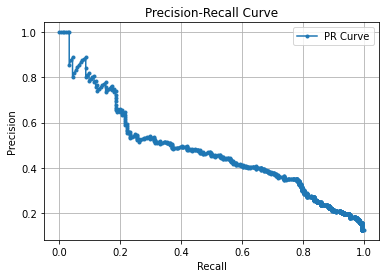

F1 Score : 0.88
PR-AUC-score : 0.48
Precision : 0.62
Recall : 0.22
--------------------------------
Confusion Matrix
 : [[1561   25]
 [ 144   40]]
--------------------------------
Classification Report
               precision  recall  f1-score  support
0                  0.92    0.98      0.95   1586.0
1                  0.62    0.22      0.32    184.0
accuracy           0.90    0.90      0.90      0.9
macro avg          0.77    0.60      0.63   1770.0
weighted avg       0.88    0.90      0.88   1770.0


In [ ]:
# Evaluate Model
evaluate_model(xgb_clf_cv, X_test, y_test, desired_precision= 0.8)

1. pr-auc score, f1 score 어느정도 되는 모델을 찾기 (GridSearchCV)
2. threshold 조정하여 precision-recall balance

In our case, In lending scenarios, in my personal opinion, i believe the precision is slightly more important to avoid the risk of bad loans. but i am not sure about what your team and organization aims for. if retaining potential customer is a concern, a high recall could also be a valuable option. 
but yea, since i don't really know about the goal, I'd definitely look at F1 score for having safe precision and recall balance.

High precision -> conservative, it's very selective about which applications it predics as successful, but it misses many actual successes.
High precision is valuable if avoiding bad loans is a priority
What's the priority
	•	If the priority is risk minimization (avoiding defaults and reducing financial loss), then a higher precision and lower recall can be justifiable. A conservative threshold (like 0.90) helps ensure that only highly likely successful applicants are approved, aligning with a risk-averse approach.
	•	If the goal includes capturing more successful applicants (e.g., maximizing the loan portfolio’s profitability and retaining customers), then a recall of 0.17 is too low. In this case, you’d want a threshold that balances recall and precision more effectively, as rejecting too many successful applicants could hinder growth.


precision 0.82 : 
recall 0.17 : 



# Pycaret

In [1]:
from pycaret.classification import *

In [2]:
import pandas as pd

In [3]:
full_df = pd.read_csv('full_df.csv')

In [4]:
full_df.drop(columns = 'UID', inplace= True)

In [ ]:
# best = 
compare_models(sort = 'F1', verbose = True, turbo = True, n_select = 3)

In [ ]:
tune_model(best[0], optimize = 'F1', n_iter = 20)

In [ ]:
blended_model = blend_models(best[:3])

In [ ]:
evaluate_model(blended_model)

In [ ]:
plot_model(blended_model, plot = 'confusion_matrix')